In [25]:
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix 
from sklearn.utils import class_weight
import pickle
import numpy as np

In [ ]:
test_data = pd.read_csv("../Data/Test.csv", index_col=0)

In [18]:
test_data.shape

(423, 17)

In [19]:
test_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-1.02096,-2.156046,0.374437,0.378025,0.145534,0.211876,0.646890,-0.120963,-0.826583,0.709958,-1.423875,1.077507,1.333283,-1.354616,1.172584,0.569502,0
1,0.97947,-2.156046,0.374437,0.378025,0.145534,0.211876,-1.513639,-0.120963,-0.826583,1.029013,-1.024580,-0.792395,0.396407,-1.666221,-0.007113,0.569502,1
2,0.97947,0.463812,0.374437,0.378025,0.145534,0.211876,0.646890,-0.120963,-0.050907,-0.034505,-0.227524,-0.792395,0.396407,1.417034,-1.186810,-0.555801,6
3,-1.02096,0.463812,0.374437,0.378025,0.145534,0.211876,0.646890,-0.120963,-0.516313,1.135365,1.998165,1.077507,0.396407,1.023427,-0.620555,0.129671,4
4,0.97947,0.463812,0.374437,0.378025,0.145534,0.211876,-1.513639,-0.120963,1.345309,-0.034505,0.635952,0.479138,-0.347961,-1.666221,1.160787,-1.090236,3


In [20]:
X_test_data = test_data.copy()
y_test_data = X_test_data.pop("NObeyesdad")

In [ ]:
class_weights = pickle.load(open('../tools/class_weights.sav', 'rb'))

model = load_model("../Model/obes_predictor.keras")

In [30]:
loss, accuracy = model.evaluate(X_test_data, y_test_data)
print("Loss: " + str(loss))
print("Accuracy: " + str(accuracy))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9337 - loss: 0.2256 
Loss: 0.23456908762454987
Accuracy: 0.9267139434814453


In [22]:
y_pred = model.predict(X_test_data)
classif = classification_report(np.argmax(y_pred, axis=1), y_test_data, output_dict=True)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [23]:
pd.DataFrame(classif).T

,precision,recall,f1-score,support
0,0.944444,0.980769,0.962264,52.000000
1,0.810345,0.824561,0.817391,57.000000
2,0.985714,0.945205,0.965035,73.000000
3,0.966667,0.966667,0.966667,60.000000
4,0.984615,1.000000,0.992248,64.000000
5,0.879310,0.796875,0.836066,64.000000
6,0.896552,0.981132,0.936937,53.000000
accuracy,0.926714,0.926714,0.926714,0.926714
macro avg,0.923950,0.927887,0.925230,423.000000
weighted avg,0.926871,0.926714,0.926114,423.000000


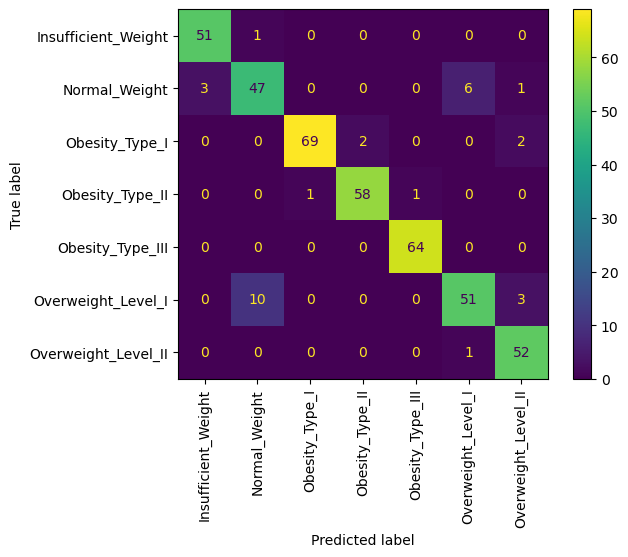

In [28]:
labels = pickle.load(open('../tools/labels.sav', 'rb'))
y_pred_inv = labels.inverse_transform(np.argmax(y_pred,axis=1))
y_test_data_inv = labels.inverse_transform(y_test_data)

conf_disp = ConfusionMatrixDisplay.from_predictions(y_pred_inv , y_test_data_inv, xticks_rotation='vertical', labels=labels.classes_)